In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sympy as sy
import math
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
k= 1
k1 = 0.5
m = 1
xaeq = 1
xbeq = 1.2
F0 = 0.005
b = 0.05
wf = 1

In [3]:
N=100000
tfinal=150
va0= 0
vb0= 0

xta= np.empty(N)
xta[0]=xaeq + 0.05 #condições dadas
xtb= np.empty(N)
xtb[0]=xbeq + 0.05

vta= np.empty(N)
vta[0]=va0
vtb= np.empty(N)
vtb[0]=vb0

t= np.empty(N)
t[0] = 0
dt=tfinal/N

maximum_a = []
minimum_a = []
maximum_b = []
minimum_b = []
    
period_list_a = []
amp_list_a = []
period_list_b = []
amp_list_b = []

In [4]:
def maxminv(x0,x1,x2,y0,y1,y2):
 # Máximo ou mínimo usando o polinómio de Lagrange
 # Dados (input): (x0,y0), (x1,y1) e (x2,y2)
 # Resultados (output): xm, ymax
 xab=x0-x1
 xac=x0-x2
 xbc=x1-x2
 a=y0/(xab*xac)
 b=-y1/(xab*xbc)
 c=y2/(xac*xbc)
 xmla=(b+c)*x0+(a+c)*x1+(a+b)*x2
 xm=0.5*xmla/(a+b+c)
 xta=xm-x0
 xtb=xm-x1
 xtc=xm-x2
 ymax=a*xtb*xtc+b*xta*xtc+c*xta*xtb
 return xm, ymax

In [5]:
def eulercromer():
    for i in range(N-1):
        axa = (-k*(xta[i] - xaeq) - k1 * ((xta[i] - xaeq) - (xtb[i] - xbeq)) - b*vta[i] + F0*math.cos(wf*t[i]))/m
        axb = (-k*(xtb[i] - xbeq) - k1 * ((xtb[i] - xbeq) - (xta[i] - xaeq)) - b*vtb[i])/m

                
        vta[i+1]=vta[i]+axa*dt
        vtb[i+1]=vtb[i]+axb*dt
        
        
        xta[i+1]=xta[i]+vta[i+1]*dt
        xtb[i+1]=xtb[i]+vtb[i+1]*dt

        t[i+1] = t[i] + dt

        if (xta[i-1] < xta[i] > xta[i+1]) and i>=100/dt: #para estar no regime estacionario
            t0, t1, t2 = (i-1)*dt, i*dt, (i+1)*dt
            y0, y1, y2 = xta[i-1], xta[i], xta[i+1]
            xm, xmax = maxminv(t0, t1, t2, y0, y1, y2)
            maximum_a.append([xm, xmax])
        if (xta[i-1]> xta[i] < xta[i+1]) and i>=100/dt: 
            t0, t1, t2 = (i-1)*dt, i*dt, (i+1)*dt
            y0, y1, y2 = xta[i-1], xta[i], xta[i+1]
            xm, xmin = maxminv(t0, t1, t2, y0, y1, y2)
            minimum_a.append([xm, xmin])


        if (xtb[i-1] < xtb[i] > xtb[i+1]) and i>=100/dt: #para estar no regime estacionario
            t0, t1, t2 = (i-1)*dt, i*dt, (i+1)*dt
            y0, y1, y2 = xtb[i-1], xtb[i], xtb[i+1]
            xm, xmax = maxminv(t0, t1, t2, y0, y1, y2)
            maximum_b.append([xm, xmax])
        if (xtb[i-1]> xtb[i] < xtb[i+1]) and i>=100/dt: 
            t0, t1, t2 = (i-1)*dt, i*dt, (i+1)*dt
            y0, y1, y2 = xtb[i-1], xtb[i], xtb[i+1]
            xm, xmin = maxminv(t0, t1, t2, y0, y1, y2)
            minimum_b.append([xm, xmin])
        
        
    return
eulercromer()

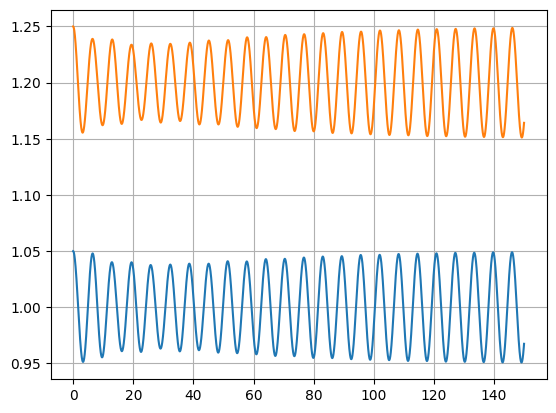

In [6]:
offset = 0.5 #just to visually push the graphs up so they're separate

plt.plot(t, xta, linestyle="-")
plt.plot(t, xtb, linestyle="-")
plt.grid(True)
plt.show()

In [7]:
def calculate_period():
    for i in range(1, len(maximum_a)):
        period_list_a.append(maximum_a[i][0]-maximum_a[i-1][0])

    for i in range(1, len(maximum_b)):
        period_list_b.append(maximum_b[i][0]-maximum_b[i-1][0])
    estimated_period_a= (sum(period_list_a)/len(period_list_a))
    estimated_period_b= (sum(period_list_b)/len(period_list_b))
    return estimated_period_a, estimated_period_b
def calculate_amplitude():
    avg_max_a = sum(x[1] for x in maximum_a) / len(maximum_a)
    avg_min_a = sum(x[1] for x in minimum_a) / len(minimum_a)
    avg_max_b = sum(x[1] for x in maximum_b) / len(maximum_b)
    avg_min_b = sum(x[1] for x in minimum_b) / len(minimum_b)
    return abs(avg_max_a - avg_min_a) / 2 , abs(avg_max_b - avg_min_b) / 2

T = calculate_period()
Amp = calculate_amplitude()
print(Amp, T)

(0.048201080254325956, 0.047727169656920254) (6.291819283129515, 6.291048353727561)


In [8]:
wf_amp_a = []
wf_list_a = []
wf_amp_b = []
wf_list_b = []
for i in range(0, 25):
    wf = 0.1*i
    N=100000
    tfinal=150
    xta= np.empty(N)
    xta[0]=xaeq + 0.05 #condições dadas
    xtb= np.empty(N)
    xtb[0]=xbeq + 0.05
    
    vta= np.empty(N)
    vta[0]=va0
    vtb= np.empty(N)
    vtb[0]=vb0
    
    t= np.empty(N)
    t[0] = 0
    dt=tfinal/N
    
    maximum_a = []
    minimum_a = []
    maximum_b = []
    minimum_b = []
    
    period_list_a = []
    amp_list_a = []
    period_list_b = []
    amp_list_b = []

    eulercromer()

    Ta, Tb = calculate_period()
    Amp_a, Amp_b = calculate_amplitude()
    
    wf_list_a.append(wf)
    wf_amp_a.append(Amp_a)
    wf_list_b.append(wf)
    wf_amp_b.append(Amp_b)

(0.0, 3.0)

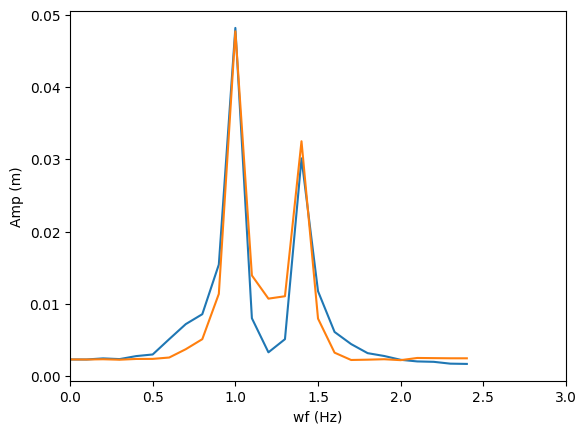

In [9]:
plt.plot(wf_list_a, wf_amp_a, linestyle="-")
plt.plot(wf_list_b, wf_amp_b, linestyle="-")
plt.xlabel("wf (Hz)")
plt.ylabel("Amp (m)")
plt.xlim(0,3)